In [ ]:
!pip install pandas 
!pip install openpyxl
!pip install matplotlib seaborn
#для запуска необходима установкла следующих библиотек

In [ ]:
main  = r'4.4.1.xlsx'


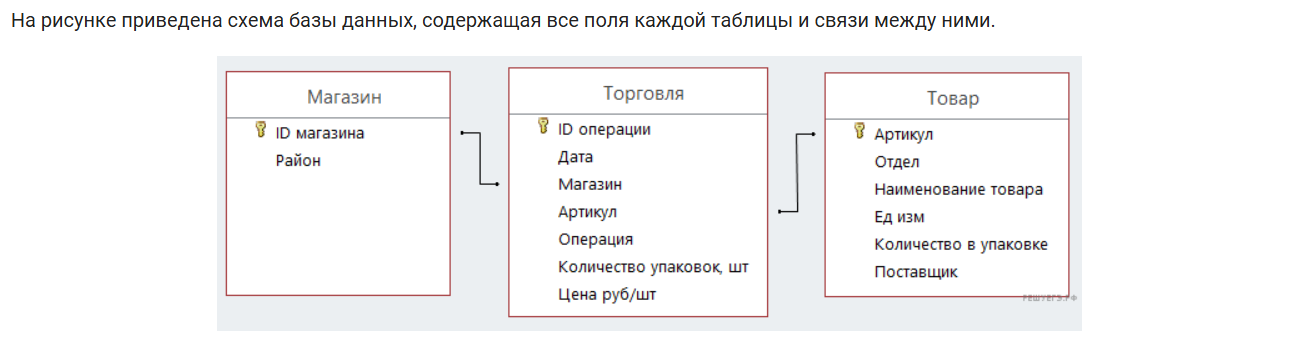
### Используя информацию из приведённой базы данных, определите общую прибыль, полученную за месяц магазинами Центрального района от торговли всеми видами круп.Под прибылью в этой задаче понимается разница между стоимостью продажи и стоимостью поставки товаров.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
sales = pd.read_excel(main,sheet_name='Торговля')
sales['Дата']=pd.to_datetime(sales['Дата'],dayfirst=True)
products = pd.read_excel(main,sheet_name='Товар')
shops = pd.read_excel(main,sheet_name='Магазин')
#считываем каждый лист в отдельный датафрейм и даем им осмысленное название. В продажах преобрахуем столбец дата в тип дата,
#с учетом того что первым идет день

In [34]:
#перед соединением фильтруем датафреймы 
shops = shops[shops['Район']=='Центральный']
products = products[(products['Наименование товара'].str.startswith('Крупа'))|(products['Наименование товара'].str.startswith('крупа'))]

sales.rename({'Магазин':'ID'},axis=1,inplace = True)
shops.rename({"ID магазина":"ID"},axis=1,inplace=True)
#соединяем датафреймы 
sales = sales.merge(shops,how='inner', on ='ID').merge(products,how='inner',on='Артикул')

In [35]:

sales.rename(columns={
    'ID операции': 'ID_Operation',
    'Дата': 'Date',
    'ID': 'ID',
    'Артикул': 'Article',
    'Операция': 'Operation',
    'Количество\nупаковок, шт': 'Quantity_Packages',
    'Цена руб/шт': 'Price_per_unit',
    'Район': 'District',
    'Отдел': 'Department',
    'Наименование товара': 'Product_Name',
    'Поставщик': 'Supplier'
}, inplace=True)
# также удалим ненужные 
sales.drop(columns=['Ед изм', 'Количество\nв упаковке'], inplace=True)
sales.info()
#смотрим интересующие нас данные так как нам нужно общее количество выручки посчитать,
#  нужно создать колонку с перемноженным количеством на цену за штуку, если ма планируем загружать датафрейм в базу данных , можно переименовать колонки 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID
операции        1434 non-null   int64         
 1   Date               1434 non-null   datetime64[ns]
 2   ID                 1434 non-null   object        
 3   Article            1434 non-null   int64         
 4   Operation          1434 non-null   object        
 5   Quantity_Packages  1434 non-null   int64         
 6   Price_per_unit     1434 non-null   int64         
 7   District           1434 non-null   object        
 8   Department         1434 non-null   object        
 9   Product_Name       1434 non-null   object        
 10  Supplier           1434 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 123.4+ KB


In [37]:
#назовем колонку total_price
sales['Total_price']=sales['Price_per_unit']*sales['Quantity_Packages']

In [38]:
sales.head()

,ID\nоперации,Date,ID,Article,Operation,Quantity_Packages,Price_per_unit,District,Department,Product_Name,Supplier,Total_price
0,235,2021-06-01,М08,46,Поставка,200,49,Центральный,Бакалея,Крупа манная,Мелькомбинат,9800
1,295,2021-06-01,М10,34,Продажа,36,94,Центральный,Бакалея,Крупа гречневая ядрица,Продбаза,3384
2,307,2021-06-01,М10,56,Продажа,28,97,Центральный,Бакалея,Крупа пшено,Продбаза,2716
3,354,2021-06-01,М12,34,Продажа,330,92,Центральный,Бакалея,Крупа гречневая ядрица,Продбаза,30360
4,358,2021-06-01,М12,46,Продажа,238,47,Центральный,Бакалея,Крупа манная,Мелькомбинат,11186


In [39]:
#сохраним датафрейм в файл, для загрузки в базу данных , либо для аналитиков 
sales.to_csv('output.csv')

C:\Users\Tony_Mony\AppData\Local\Temp\ipykernel_6540\293869660.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales, y='Product_Name', order=sales['Product_Name'].value_counts().index, palette='viridis')


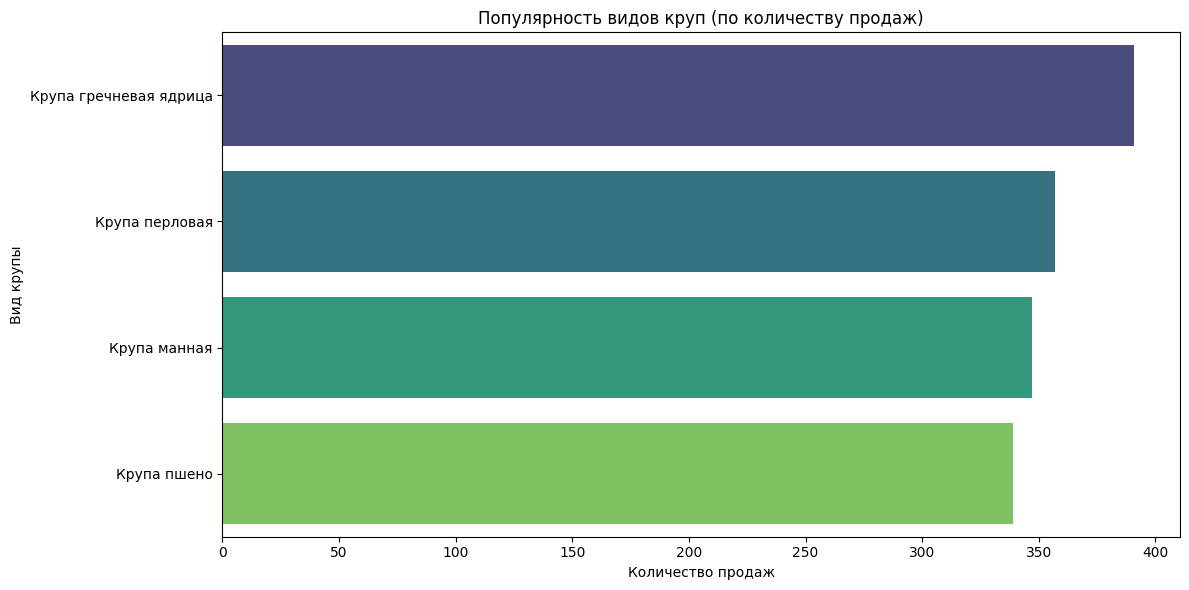

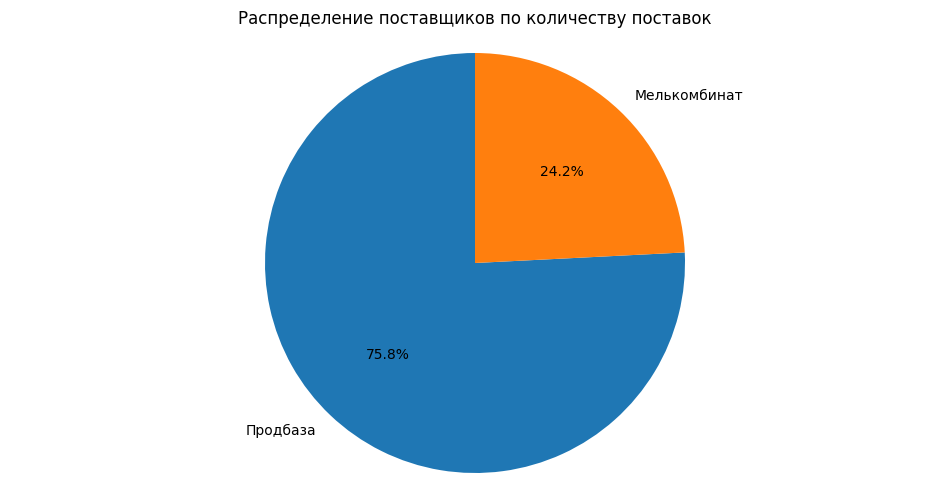

<Figure size 1900x800 with 0 Axes>

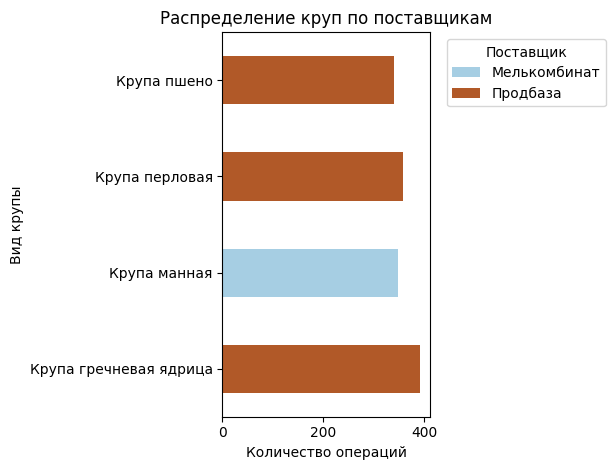

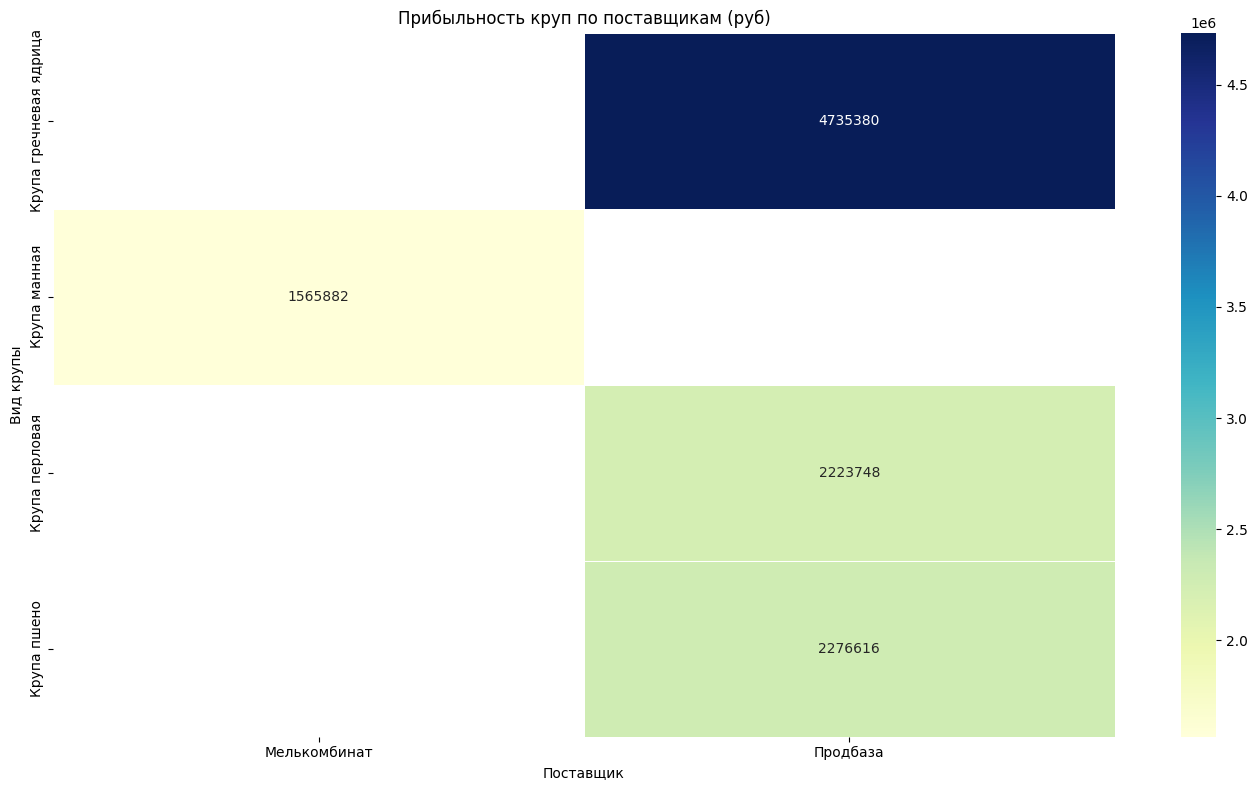

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Диаграмма популярности круп
plt.figure(figsize=(12, 6))
sns.countplot(data=sales, y='Product_Name', order=sales['Product_Name'].value_counts().index, palette='viridis')

plt.title('Популярность видов круп (по количеству продаж)')
plt.xlabel('Количество продаж')
plt.ylabel('Вид крупы')
plt.tight_layout()
plt.show()

# 2. Диаграмма поставщиков
plt.figure(figsize=(12, 6))
supplier_counts = sales['Supplier'].value_counts()
plt.pie(supplier_counts, labels=supplier_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Распределение поставщиков по количеству поставок')

plt.axis('equal')
plt.show()

# 3. Комбинированная диаграмма (крупы по поставщикам)
plt.figure(figsize=(19, 8))
cross_tab = pd.crosstab(sales['Product_Name'], sales['Supplier'])
cross_tab.plot(kind='barh', stacked=True, colormap='Paired')

plt.title('Распределение круп по поставщикам')
plt.xlabel('Количество операций')
plt.ylabel('Вид крупы')
plt.legend(title='Поставщик', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
# 4 прибыльность по поставщикам 
pivot_profit = sales.pivot_table(values='Total_price', 
                                index='Product_Name', 
                                columns='Supplier', 
                                aggfunc='sum')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_profit, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Прибыльность круп по поставщикам (руб)')
plt.xlabel('Поставщик')
plt.ylabel('Вид крупы')
plt.tight_layout()
plt.show()

## Пояснения:

### Первая диаграмма (countplot):

* Показывает какие крупы покупают чаще всего
* Сортировка по популярности (сверху - самые популярные)
* Использует вертикальную ориентацию для удобства чтения названий

### Вторая диаграмма (barplot):

* Анализирует каких поставщиков чаще всего выбирают
* Пастельная цветовая схема для лучшего восприятия
* Значения отсортированы по количеству

### Третья диаграмма (stacked bar):

* Показывает связь между видами круп и поставщиками
* Накопленное отображение помогает увидеть распределение
* Использует разные цвета для каждого поставщика

### Тепловая карта:

* Показывает кросс-анализ: какие продажи приносят больше прибыли по поставщикам .
* Чем темнее ячейка — тем выше прибыль.

In [42]:
#сгруппируем полученный датафрейм по номеру месяца,
#  в данном случае у меня только один месяц, но было бы нескольно можно было бы отследить динамику по месяцам
#узнаем итоговую сумму продаж по магазинам в центральном районе по продажам крупы, можно было бы не фильтровать и разбить группировку по округам и товарам
# но я делаю учет на то что у нас может быть большой массив данных. чтобы не перегружать систему
df = sales.groupby([sales['Date'].dt.month,sales.Operation]).agg({'Total_price':'sum'})
df

Total_price
Date Operation             
6    Поставка       4973020
     Продажа        5828606

In [ ]:
total_supply = df.loc[(slice(None), 'Поставка'), 'Total_price'].sum()
total_sales = df.loc[(slice(None), 'Продажа'), 'Total_price'].sum()

#получаем результат чистого дохода от общей цены продаж вычли цену поставки 
diff = total_sales - total_supply
diff

np.int64(855586)

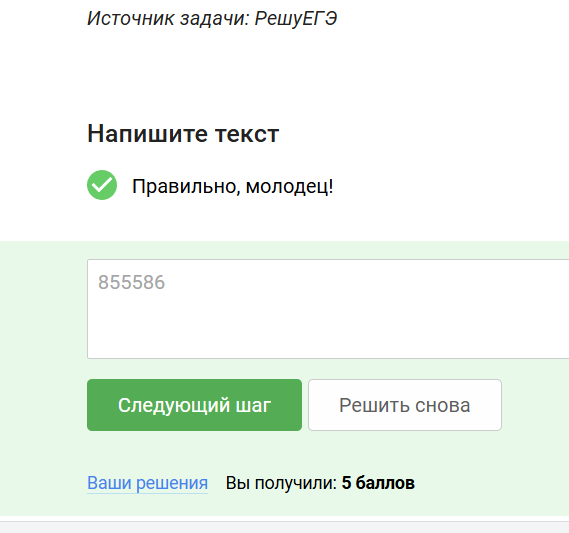
